In [13]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import numpy as np
from sklearn.ensemble import IsolationForest



In [2]:
# Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
train_data_dir = r'C:\Users\Tansam\Documents\PCB Defect Detection\dataset'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 50 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Burnt',
 'Good_Condition',
 'Missing_Parts',
 'Missing_hole',
 'Mouse_bite',
 'Open_circuit',
 'Short',
 'Spur',
 'Spurious_copper',
 'casing_body_defect']

In [5]:
#Visualize Images From the Dataset

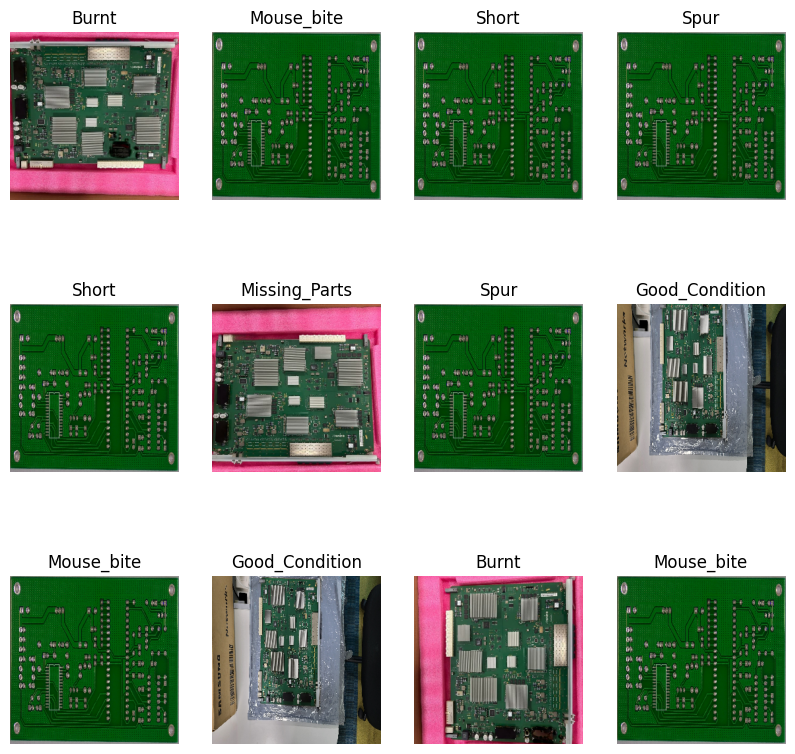

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
#Data Split

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
#Model Architecture

In [14]:
# Prepare data for Isolation Forest
X_train = []
for image_batch, _ in train_ds:
    for image in image_batch:
        X_train.append(image.numpy().flatten())
X_train = np.array(X_train)

# Normalize the data
X_train = X_train / 255.0

# Train Isolation Forest
isolation_forest = IsolationForest()
isolation_forest.fit(X_train)


IsolationForest()

In [23]:
#Plotting the Accuracy and Loss Curves

In [24]:
history

# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
from sklearn.ensemble import IsolationForest
# Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
train_data_dir = r'C:\Users\Tansam\Documents\PCB Defect Detection\dataset'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
class_names
#Visualize Images From the Dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.i

In [25]:
history.params

NameError: name 'history' is not defined

In [26]:
history.history.keys()

NameError: name 'history' is not defined

In [27]:
type(history.history['loss'])

NameError: name 'history' is not defined

In [28]:
len(history.history['loss'])

NameError: name 'history' is not defined

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

NameError: name 'history' is not defined

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

In [43]:
# Assuming you have the following lists:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS)

# You can extract the accuracy and loss values from the history object like this:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Now you can plot the accuracy and loss values
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'model' is not defined

NameError: name 'acc' is not defined

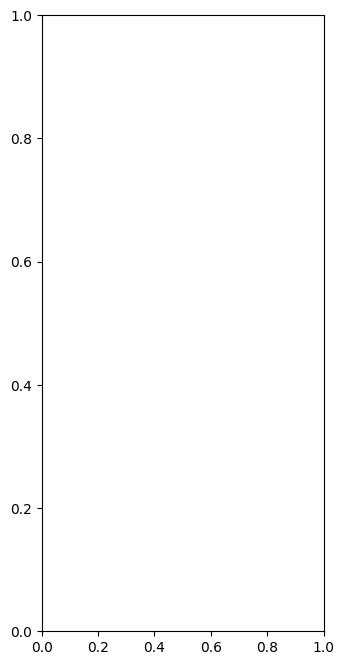

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
#Run prediction on a sample image

first image to predict
actual label: Mouse_bite


NameError: name 'model' is not defined

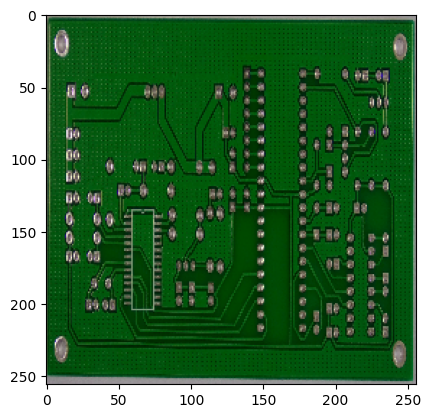

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
#Write a function for inference

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [36]:
#Now run inference on few sample images

In [37]:
def display_predictions(images_batch, labels_batch, predictions):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))

        predicted_class, confidence = predictions[i]
        actual_class = class_names[labels_batch[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%" if predicted_class != 'Anomaly' else "Actual: {actual_class},\n Predicted: {predicted_class}.")

        plt.axis("off")

In [38]:
# Evaluate Isolation Forest

In [39]:
anomaly_scores = isolation_forest.decision_function(X_train)
predictions = []
for i, score in enumerate(anomaly_scores):
    if score < -0.5:  # Adjust threshold as needed
        predicted_class = 'Anomaly'
    else:
        predicted_class = class_names[np.argmax(score)]
    confidence = round(100 * np.max(score), 2) if predicted_class != 'Anomaly' else None
    predictions.append((predicted_class, confidence))


In [40]:
# Visualize predictions

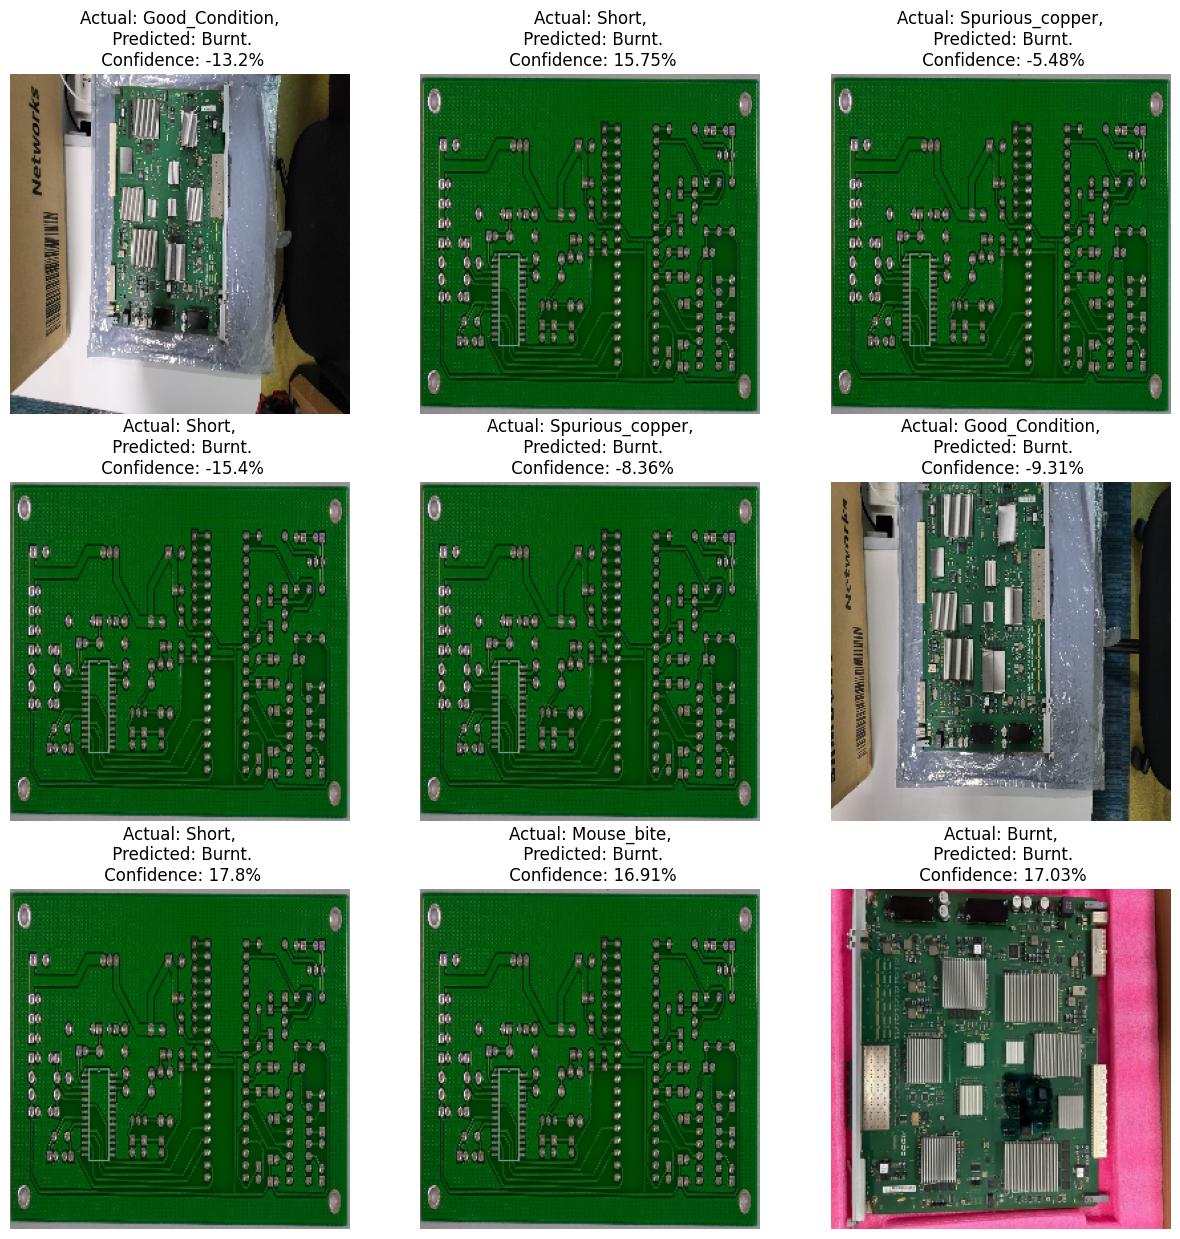

In [41]:
for images, labels in test_ds.take(1):
    display_predictions(images, labels, predictions)
    plt.show()

In [42]:
#Saving the Model

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")